# plot function tests

In [1]:
__author__    = 'Kevin Tetz'
__copyright__ = 'Copyright (C) 2017 Steve Nicholes'
__license__   = 'GPL v3'
__version__   = '0.1.0'

In [2]:
# Imports
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os, sys, pdb
import scipy as sp
import pandas as pd

#sys.path = [r'C:\GitHub\fivecentplots'] + sys.path
sys.path = ['..\..'] + sys.path  # relative import

import fivecentplots as fcp
filt = fcp.fcp.df_filter

osjoin = os.path.join
db = pdb.set_trace

In [3]:
#imports = r'c:\code\jupy\imports'
#%run $imports -sns -q -s no

# test file

In [4]:
df = pd.read_csv(r'.\fake_data.csv')
df.head().T

FileNotFoundError: [Errno 2] No such file or directory: '.\\fake_data.csv'

## filter for temperature

### unique from file

In [5]:
df['Temperature [C]'].unique()

NameError: name 'df' is not defined

### unique after filter 

In [6]:
fcp.df_filter(df, 'Temperature_C > 30')['Temperature [C]'].unique()

NameError: name 'df' is not defined

## missing column
* returns same with nothing filtered

In [7]:
fcp.df_filter(df, 'blah > 0').head().T

NameError: name 'df' is not defined

# get_current_values 

In [8]:
print(fcp.fcp.get_current_values.__doc__)


    Parse a string looking for text enclosed by 'key' and replace with the
    current value from the DataFrame

    Args:
        df (pd.DataFrame): DataFrame containing values we are looking for
        text (str): string to parse
        key (str): matching chars that enclose the value to replace from df

    Returns:
        updated string
    


.. todo:: add

# df_filter

In [9]:
print(fcp.fcp.df_filter.__doc__)


    Filter the DataFrame

    Due to limitations in pd.query, column names must not have spaces.  This
    function will temporarily replace spaces in the column names with
    underscores, but the supplied query string must contain column names
    without any spaces

    Args:
        df (pd.DataFrame):  DataFrame to filter
        filt_orig (str):  query expression for filtering
        drop_cols (bool): drop filtered columns from results

    Returns:
        filtered DataFrame
    


## test strings 
* preferred to test as string rather than as pd.DataFrame first

In [10]:
chars = {' ': '_', '.': 'dot', '[': '',']': '', '(': '', ')': '',
         '-': '_', '^': '', '>': '', '<': '', '/': '_', '@': 'at',
         '%': 'percent'}

In [11]:
cols = ['a', 'b', 'c [spam]', 'd [spam/eggs]', 'e (blah)']
df = pd.DataFrame({c: sp.randn(100) for c in cols})
df.head().T

,0,1,2,3,4
a,0.347481,0.928054,0.492748,1.671426,-0.394729
b,-0.587835,0.740890,0.529372,-0.235204,0.034931
c [spam],0.839203,-0.837615,1.448916,0.019713,-0.762469
d [spam/eggs],-0.305741,-0.664077,-0.983036,0.183468,0.071692
e (blah),0.901193,0.277558,0.425213,-0.617375,0.399577


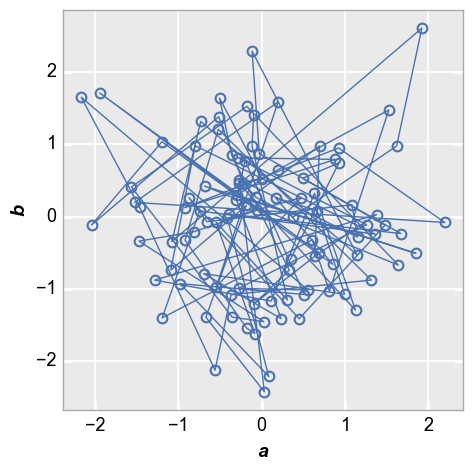

In [12]:
fcp.plot(df=df, x='a', y='b', inline=True)

### b > 0

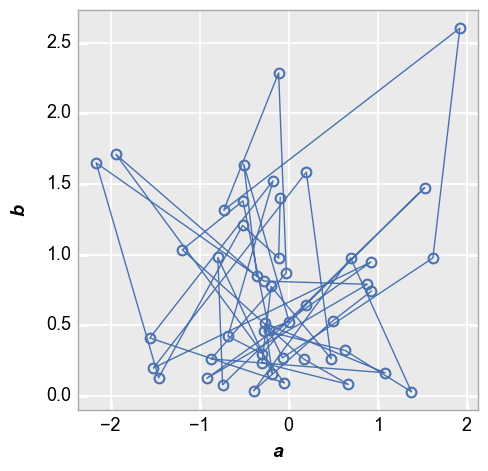

In [13]:
filt_orig = 'b > 0'
fcp.plot(df=filt(df, filt_orig), x='a', y='b', inline=True)

### c [spam] > 0

In [14]:
filt_orig = 'c_spam > 0'
fcp.plot(df=filt(df, filt_orig), x='a', y='c [spam]', inline=True)

Could not filter data!
   Original filter string: c_spam > 0
   Modified filter string: fCpc_spam>0


DataError: No column named "a" found in DataFrame

### d_spam_eggs > 0

In [15]:
filt_orig = 'd_spam_eggs > 0'
fcp.plot(df=filt(df, filt_orig), x='a', y='d [spam/eggs]', inline=True)

Could not filter data!
   Original filter string: d_spam_eggs > 0
   Modified filter string: fCpd_spam_eggs>0


DataError: No column named "a" found in DataFrame